In [1]:
import tpqoa

In [2]:
api = tpqoa.tpqoa('aiif.cfg')

In [3]:
import os
import time
import numpy as np
import pandas as pd
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [4]:
ins = api.get_instruments()

In [5]:
ins

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD'),
 ('AUD/SGD', 'AUD_SGD'),
 ('AUD/USD', 'AUD_USD'),
 ('CAD/CHF', 'CAD_CHF'),
 ('CAD/HKD', 'CAD_HKD'),
 ('CAD/JPY', 'CAD_JPY'),
 ('CAD/SGD', 'CAD_SGD'),
 ('CHF/HKD', 'CHF_HKD'),
 ('CHF/JPY', 'CHF_JPY'),
 ('CHF/ZAR', 'CHF_ZAR'),
 ('EUR/AUD', 'EUR_AUD'),
 ('EUR/CAD', 'EUR_CAD'),
 ('EUR/CHF', 'EUR_CHF'),
 ('EUR/CZK', 'EUR_CZK'),
 ('EUR/DKK', 'EUR_DKK'),
 ('EUR/GBP', 'EUR_GBP'),
 ('EUR/HKD', 'EUR_HKD'),
 ('EUR/HUF', 'EUR_HUF'),
 ('EUR/JPY', 'EUR_JPY'),
 ('EUR/NOK', 'EUR_NOK'),
 ('EUR/NZD', 'EUR_NZD'),
 ('EUR/PLN', 'EUR_PLN'),
 ('EUR/SEK', 'EUR_SEK'),
 ('EUR/SGD', 'EUR_SGD'),
 ('EUR/TRY', 'EUR_TRY'),
 ('EUR/USD', 'EUR_USD'),
 ('EUR/ZAR', 'EUR_ZAR'),
 ('GBP/AUD', 'GBP_AUD'),
 ('GBP/CAD', 'GBP_CAD'),
 ('GBP/CHF', 'GBP_CHF'),
 ('GBP/HKD', 'GBP_HKD'),
 ('GBP/JPY', 'GBP_JPY'),
 ('GBP/NZD', 'GBP_NZD'),
 ('GBP/PLN', 'GBP_PLN'),
 ('GBP/SGD', 'GBP_SGD'),
 ('GBP/USD', 'GBP_USD'),


In [6]:
raw = api.get_history(instrument='EUR_USD',
                      start='2018-01-01',
                      end='2020-07-31',
                      granularity='D',
                      price='A')

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671 entries, 2018-01-01 22:00:00 to 2020-07-30 21:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         671 non-null    float64
 1   h         671 non-null    float64
 2   l         671 non-null    float64
 3   c         671 non-null    float64
 4   volume    671 non-null    int64  
 5   complete  671 non-null    bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 32.1 KB


In [8]:
raw.head()

,o,h,l,c,volume,complete
time,,,,,,
2018-01-01 22:00:00,1.20101,1.20819,1.20051,1.20610,35630,True
2018-01-02 22:00:00,1.20620,1.20673,1.20018,1.20170,31354,True
2018-01-03 22:00:00,1.20170,1.20897,1.20049,1.20710,35187,True
2018-01-04 22:00:00,1.20692,1.20847,1.20215,1.20327,36478,True
2018-01-07 22:00:00,1.20301,1.20530,1.19564,1.19717,27618,True


<Axes: xlabel='time'>

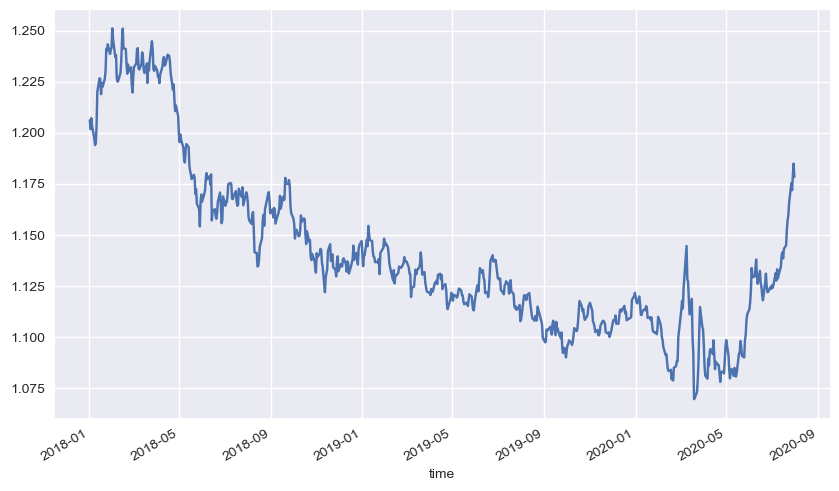

In [9]:
raw['c'].plot(figsize=(10, 6))

In [10]:
raw = api.get_history(instrument='EUR_USD',
                      start='2020-07-01',
                      end='2020-07-31',
                      granularity='M1',
                      price='M')

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30729 entries, 2020-07-01 00:00:00 to 2020-07-31 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         30729 non-null  float64
 1   h         30729 non-null  float64
 2   l         30729 non-null  float64
 3   c         30729 non-null  float64
 4   volume    30729 non-null  int64  
 5   complete  30729 non-null  bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 1.4 MB


In [12]:
raw.tail()

,o,h,l,c,volume,complete
time,,,,,,
2020-07-30 23:56:00,1.18736,1.18758,1.18722,1.18757,57,True
2020-07-30 23:57:00,1.18756,1.18756,1.18734,1.18734,49,True
2020-07-30 23:58:00,1.18736,1.18737,1.18713,1.18717,36,True
2020-07-30 23:59:00,1.18718,1.18724,1.18714,1.18722,31,True
2020-07-31 00:00:00,1.18721,1.18752,1.18695,1.18750,120,True


<Axes: xlabel='time'>

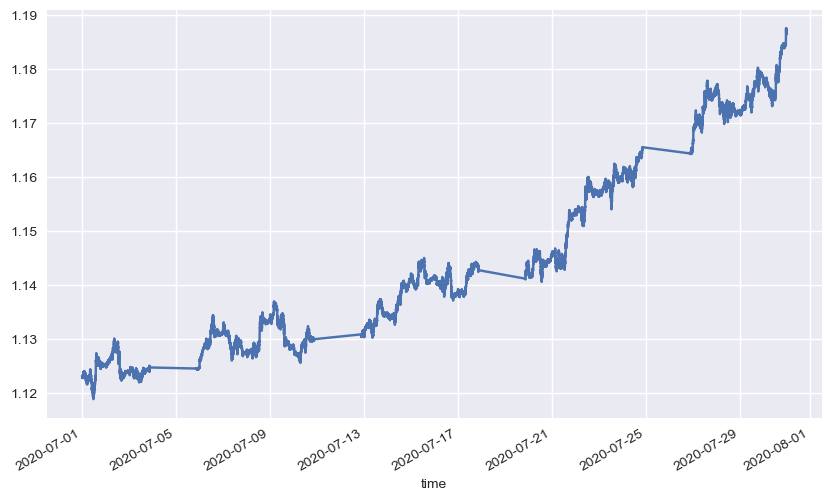

In [13]:
raw['c'].plot(figsize=(10, 6))

In [14]:
# api.stream_data('EUR_USD', stop=10)

In [15]:
order = api.create_order('EUR_USD', units=25000, suppress=True, ret=True)

In [16]:
pprint(order)

{'accountBalance': '99747.25',
 'accountID': '101-001-26247300-001',
 'batchID': '344',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '10000000', 'price': 1.08917}],
               'bids': [{'liquidity': '10000000', 'price': 1.08902}],
               'closeoutAsk': 1.08917,
               'closeoutBid': 1.08902,
               'type': 'PRICE'},
 'fullVWAP': 1.08917,
 'gainQuoteHomeConversionFactor': '1.0',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.875',
 'id': '345',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '1.0',
 'orderID': '344',
 'pl': '0.0',
 'price': 1.08917,
 'reason': 'MARKET_ORDER',
 'requestID': '43111079927282408',
 'time': '2023-07-05T09:03:47.971263157Z',
 'tradeOpened': {'guaranteedExecutionFee': '0.0',
                 'halfSpreadCost': '1.875',
                 'initialMarginRequired': '544.55',
                 'price': 1.08917,
                 'tradeID': '345',
                 'units': '25000.0'},
 

In [17]:
def print_details(order):
    details = (order['time'][:-7], order['instrument'], order['units'],
               order['price'], order['pl'])
    return details

In [18]:
print_details(order)

('2023-07-05T09:03:47.971', 'EUR_USD', '25000.0', 1.08917, '0.0')

In [19]:
time.sleep(1)

In [20]:
order = api.create_order('EUR_USD', units=-25000, suppress=True, ret=True)

In [21]:
pprint(order)

{'accountBalance': '99743.5',
 'accountID': '101-001-26247300-001',
 'batchID': '346',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '9975000', 'price': 1.08915}],
               'bids': [{'liquidity': '10000000', 'price': 1.08902}],
               'closeoutAsk': 1.08915,
               'closeoutBid': 1.08902,
               'type': 'PRICE'},
 'fullVWAP': 1.08902,
 'gainQuoteHomeConversionFactor': '1.0',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.625',
 'id': '347',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '1.0',
 'orderID': '346',
 'pl': '-3.75',
 'price': 1.08902,
 'reason': 'MARKET_ORDER',
 'requestID': '43111079935672453',
 'time': '2023-07-05T09:03:49.295345117Z',
 'tradesClosed': [{'financing': '0.0',
                   'guaranteedExecutionFee': '0.0',
                   'halfSpreadCost': '1.625',
                   'price': 1.08902,
                   'realizedPL': '-3.75',
                   'tradeID': '345',
  

In [22]:
print_details(order)

('2023-07-05T09:03:49.295', 'EUR_USD', '-25000.0', 1.08902, '-3.75')

In [23]:
order = api.create_order('EUR_USD', units=25000, sl_distance=0.005, suppress=True, ret=True)

In [24]:
pprint(order)

{'accountBalance': '99743.5',
 'accountID': '101-001-26247300-001',
 'batchID': '348',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '9975000', 'price': 1.08917}],
               'bids': [{'liquidity': '9975000', 'price': 1.08902}],
               'closeoutAsk': 1.08917,
               'closeoutBid': 1.08902,
               'type': 'PRICE'},
 'fullVWAP': 1.08917,
 'gainQuoteHomeConversionFactor': '1.0',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.875',
 'id': '349',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '1.0',
 'orderID': '348',
 'pl': '0.0',
 'price': 1.08917,
 'reason': 'MARKET_ORDER',
 'requestID': '25096681422957844',
 'time': '2023-07-05T09:03:49.618820551Z',
 'tradeOpened': {'guaranteedExecutionFee': '0.0',
                 'halfSpreadCost': '1.875',
                 'initialMarginRequired': '544.55',
                 'price': 1.08917,
                 'tradeID': '349',
                 'units': '25000.0'},
 'ty

In [25]:
print_details(order)

('2023-07-05T09:03:49.618', 'EUR_USD', '25000.0', 1.08917, '0.0')

In [26]:
sl_order = api.get_transaction(tid=int(order['id']) + 1)
sl_order

{'id': '350',
 'time': '2023-07-05T09:03:49.618820551Z',
 'userID': 26247300,
 'accountID': '101-001-26247300-001',
 'batchID': '348',
 'requestID': '25096681422957844',
 'type': 'STOP_LOSS_ORDER',
 'tradeID': '349',
 'price': 1.08417,
 'distance': '0.005',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [27]:
(sl_order['time'], sl_order['type'], order['price'], sl_order['price'], sl_order['distance'])

('2023-07-05T09:03:49.618820551Z',
 'STOP_LOSS_ORDER',
 1.08917,
 1.08417,
 '0.005')

In [28]:
time.sleep(1)

In [29]:
order = api.create_order('EUR_USD', units=-25000, suppress=True, ret=True)

In [30]:
print_details(order)

('2023-07-05T09:03:51.125', 'EUR_USD', '-25000.0', 1.08898, '-4.75')

In [31]:
order = api.create_order('EUR_USD', units=25000, tsl_distance=0.005, suppress=True, ret=True)

In [32]:
print_details(order)

('2023-07-05T09:03:51.456', 'EUR_USD', '25000.0', 1.08911, '0.0')

In [33]:
tsl_order = api.get_transaction(tid=int(order['id']) + 1)
tsl_order

{'id': '356',
 'time': '2023-07-05T09:03:51.456236580Z',
 'userID': 26247300,
 'accountID': '101-001-26247300-001',
 'batchID': '354',
 'requestID': '43111079944063377',
 'type': 'TRAILING_STOP_LOSS_ORDER',
 'tradeID': '355',
 'distance': '0.005',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [34]:
(tsl_order['time'][:-7], tsl_order['type'], order['price'], tsl_order['distance'])

('2023-07-05T09:03:51.456', 'TRAILING_STOP_LOSS_ORDER', 1.08911, '0.005')

In [35]:
time.sleep(1)

In [36]:
order = api.create_order('EUR_USD', units=-25000, suppress=True, ret=True)

In [37]:
print_details(order)

('2023-07-05T09:03:53.067', 'EUR_USD', '-25000.0', 1.08897, '-3.5')

In [38]:
api.print_transactions(tid=int(order['id']) - 22)

 338 | 2023-07-05T08:12:51.38 | EUR_USD | -25000.0 |     -2.0
 341 | 2023-07-05T08:33:00.67 | EUR_USD | -25000.0 |      0.0
 343 | 2023-07-05T08:47:01.37 | EUR_USD |  25000.0 |    -31.0
 345 | 2023-07-05T09:03:47.97 | EUR_USD |  25000.0 |      0.0
 347 | 2023-07-05T09:03:49.29 | EUR_USD | -25000.0 |    -3.75
 349 | 2023-07-05T09:03:49.61 | EUR_USD |  25000.0 |      0.0
 352 | 2023-07-05T09:03:51.12 | EUR_USD | -25000.0 |    -4.75
 355 | 2023-07-05T09:03:51.45 | EUR_USD |  25000.0 |      0.0
 358 | 2023-07-05T09:03:53.06 | EUR_USD | -25000.0 |     -3.5


In [39]:
api.get_account_summary()

{'id': '101-001-26247300-001',
 'alias': 'Primary',
 'currency': 'USD',
 'balance': '99735.25',
 'createdByUserID': 26247300,
 'createdTime': '2023-07-04T11:07:28.446568134Z',
 'guaranteedStopLossOrderMode': 'DISABLED',
 'pl': '-264.75',
 'resettablePL': '-264.75',
 'resettablePLTime': '0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.02',
 'openTradeCount': 0,
 'openPositionCount': 0,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '0.0',
 'NAV': '99735.25',
 'marginUsed': '0.0',
 'marginAvailable': '99735.25',
 'positionValue': '0.0',
 'marginCloseoutUnrealizedPL': '0.0',
 'marginCloseoutNAV': '99735.25',
 'marginCloseoutMarginUsed': '0.0',
 'marginCloseoutPercent': '0.0',
 'marginCloseoutPositionValue': '0.0',
 'withdrawalLimit': '99735.25',
 'marginCallMarginUsed': '0.0',
 'marginCallPercent': '0.0',
 'lastTransactionID': '359'}

In [40]:
import oandaenv as oe

In [41]:
symbol = 'EUR_USD'

In [42]:
date = '2020-08-11'

In [43]:
features = [symbol, 'r', 's', 'm', 'v']

In [44]:
learn_env = oe.OandaEnv(symbol=symbol,
                        start=f'{date} 08:00:00',
                        end=f'{date} 13:00:00',
                        granularity='S30',
                        price='M',
                        features=features,
                        window=20,
                        lags=3,
                        leverage=20,
                        min_accuracy=0.4,
                        min_performance=0.85)

In [45]:
np.bincount(learn_env.data['d'])

array([299, 281])

In [46]:
learn_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580 entries, 2020-08-11 08:10:00 to 2020-08-11 12:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  580 non-null    float64
 1   r        580 non-null    float64
 2   s        580 non-null    float64
 3   m        580 non-null    float64
 4   v        580 non-null    float64
 5   d        580 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 31.7 KB


In [47]:
valid_env = oe.OandaEnv(symbol=learn_env.symbol,
                        start=f'{date} 13:00:00',
                        end=f'{date} 14:00:00',
                        granularity=learn_env.granularity,
                        price=learn_env.price,
                        features=learn_env.features,
                        window=learn_env.window,
                        lags=learn_env.lags,
                        leverage=learn_env.leverage,
                        min_accuracy=0,
                        min_performance=0,
                        mu=learn_env.mu,
                        std=learn_env.std)

In [48]:
valid_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-08-11 13:10:00 to 2020-08-11 13:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  100 non-null    float64
 1   r        100 non-null    float64
 2   s        100 non-null    float64
 3   m        100 non-null    float64
 4   v        100 non-null    float64
 5   d        100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [49]:
test_env = oe.OandaEnv(symbol=learn_env.symbol,
                       start=f'{date} 14:00:00',
                       end=f'{date} 17:00:00',
                       granularity=learn_env.granularity,
                       price=learn_env.price,
                       features=learn_env.features,
                       window=learn_env.window,
                       lags=learn_env.lags,
                       leverage=learn_env.leverage,
                       min_accuracy=0,
                       min_performance=0,
                       mu=learn_env.mu,
                       std=learn_env.std)

In [50]:
test_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2020-08-11 14:10:00 to 2020-08-11 16:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  340 non-null    float64
 1   r        340 non-null    float64
 2   s        340 non-null    float64
 3   m        340 non-null    float64
 4   v        340 non-null    float64
 5   d        340 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 18.6 KB


In [51]:
# ax = learn_env.data[learn_env.symbol].plot(figsize=(10, 6))
# plt.axvline(learn_env.data.index[-1], ls='--')
# valid_env.data[learn_env.symbol].plot(ax=ax, style='-.')
# plt.axvline(valid_env.data.index[-1], ls='--')
# test_env.data[learn_env.symbol].plot(ax=ax, style='-.')

In [52]:
import tradingbot

In [53]:
tradingbot.set_seeds(100)
agent = tradingbot.TradingBot(24, 0.001, learn_env=learn_env,
                              valid_env=valid_env)

In [54]:
episodes = 31

In [55]:
agent.learn(episodes)

episode:  5/31 | VALIDATION | treward:   97 | perf: 1.004 | eps: 0.96
episode: 10/31 | VALIDATION | treward:   97 | perf: 0.982 | eps: 0.91
episode: 15/31 | VALIDATION | treward:   97 | perf: 1.007 | eps: 0.87
episode: 20/31 | VALIDATION | treward:   97 | perf: 0.993 | eps: 0.83
episode: 25/31 | VALIDATION | treward:   97 | perf: 0.981 | eps: 0.79
episode: 30/31 | VALIDATION | treward:   97 | perf: 0.975 | eps: 0.75
episode: 31/31 | treward:  577 | perf: 1.009 | av: 398.0 | max:  577


31 31


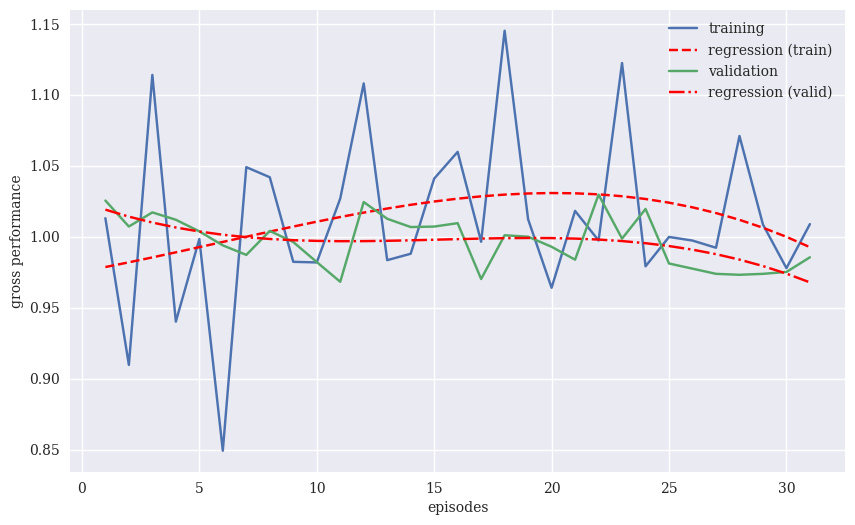

In [56]:
tradingbot.plot_performance(agent)

In [57]:
import backtest as bt

In [58]:
env = test_env

In [59]:
bt.backtest(agent, env)

In [60]:
env.data['p'].iloc[env.lags:].value_counts()

 1    169
-1    168
Name: p, dtype: int64

In [61]:
sum(env.data['p'].iloc[env.lags:].diff() != 0)

76

In [62]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).sum().apply(np.exp)

r   0.99966
s   0.95228
dtype: float64

<Axes: xlabel='time'>

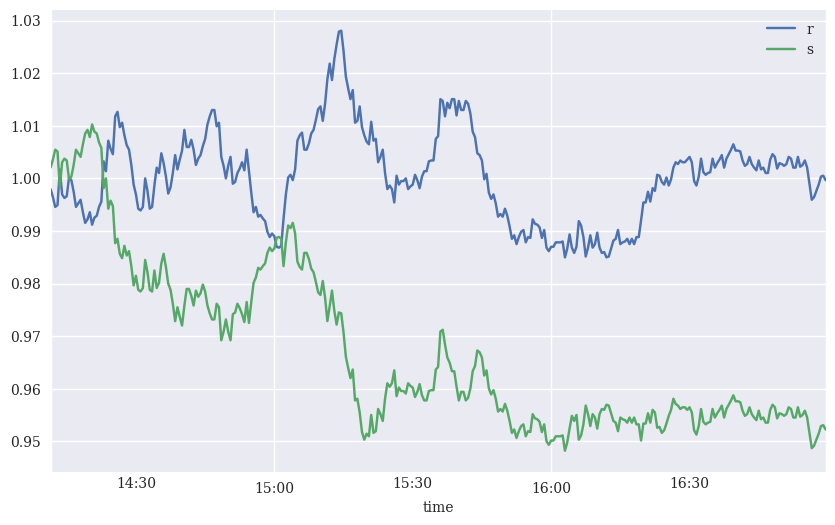

In [63]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).cumsum().apply(np.exp).plot(figsize=(10, 6))

In [64]:
from oandatb import OandaTradingBot

In [65]:
otb = OandaTradingBot('./aiif.cfg', agent, '30s', 25000, verbose=False)

In [68]:
otb.tick_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2023-07-05 09:12:02.308541961+00:00 to 2023-07-05 09:13:57.900236597+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ask     112 non-null    float64
 1   bid     112 non-null    float64
 2   mid     112 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


In [67]:
otb.stream_data(agent.learn_env.symbol, stop=1000)

KeyboardInterrupt: 

In [ ]:
print('\n' + 75 * '=')
print('*** CLOSING OUT ***')
order = otb.create_order(otb.symbol,
                         units=-otb.position * otb.units,
                         suppress=True,
                         ret=True)
otb.report_trade(otb.time, 'NEUTRAL', order)

In [ ]:
pl = np.array(otb.pl)

In [ ]:
pl

In [ ]:
pl.cumsum()

In [ ]:
import pickle

In [ ]:
pickle.dump(agent, open('trading.bot', 'wb'))

In [ ]:
agent.model.save('tradingbot_model')